# ENGR 1330 – Computational Thinking and Data Science

## Red Wine Quality Final Project - Background
In this project, a dataset related to red wine samples from the northwest region of Portugal will
be analyzed. The quality of a red wine that is determined via a sensory test is dependent on many different
physicochemical properties, namely, fixed acidity, volatile acidity, pH value, density, etc. A file named
‘winequality-red.csv’ contains information about different varieties of red wine and their quality that
depends on several physicochemical properties like the ones mentioned above. Specifically, in the dataset, there is a quality score (QS) ranging from 3 to 8 that is given to each variety of red wine depending on 11 different properties. For this project, consider that a good wine is one with a quality score of
QS ≥ 6 and a bad wine is one with a quality score of QS ≤ 5. The objective of this problem is to
classify whether the wine is good or bad depending on the 11 different properties that are in the dataset.

## Required Tasks:
(a) Literature review:
1) P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. Modeling wine preferences by data mining
from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. [Get
the research paper from Web of Science at TTU].

(b) Data acquisition:
1) Get the dataset required for this project from the following Kaggle website:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

(c) Exploratory data analysis
 1) Perform exploratory data analysis (getting information about the dataset, making plots, etc.)
 2) Modify the dataset as needed for performing the analysis

(d) Classification model
 1) Implement a classification algorithm from scratch as well as using the data science library to
classify good wines and bad wines
 2) Evaluate the model by computing the necessary evaluation metrics from scratch as well as using
the data science library


**Database Acquisition**
- Get the database from the zip file from BlackBoard or Kaggle website: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- Supply links to any additional databases discovered during the literature research

**Exploratory Data Analysis**
- Describe (in words) the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.

**Model Building**
- Build data model
- Assess data model quality
- Build the input data interface for using the model              
       
**Documentation**
- Training and Project management video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf, but you are free to use your favorite writing software (Word,LibreOffice, ...).
- Final ipynb file (see deliverables below)

## Deliverables:

#### Part 1 (due Apeil 28th):
A report that briefly describes the concrete strength database and how you plan to solve the tasks of creating a suitable data model.  
- Break down each task into manageable subtasks and describe how you intend to solve the subtasks and how you will test each task. (Perhaps make a simple Gantt Chart)
- Address the responsibilities of each team member for tasks completed and tasks to be completed until the end of the semester. (Perhaps make explicit subtask assignments)  

#### Part 2 (due May 7th):
- A well-documented JupyterLab (using a python kernel) analysis and implementation for the data model.
- A well-documented JupyterLab (using a python kernel) implementation for the data model user interface.
- A well-documented JupyterLab (using a python kernel) implementation for the database update interface.

**Above items can reside in a single notebook; but clearly identify sections that perform different tasks.**

- A how-to video demonstrating performance and description of problems that you were not able to solve and also talk about project management such as who did what. 
- Peer evaluation form 

**Above items can reside in a single video; but structure the video into the two parts; use an obvious transition when moving from "how to ..." into the project management portion.**  Keep the total video length to less than 10 minutes; submit as an *unlisted* YouTube video, and just supply the link (someone on each team is likely to have a YouTube creator account).  Keep in mind a 10 minute video can approach 100MB file size before compression, so it won't upload to Blackboard and cannot be emailed.

In [31]:
!pip install imblearn
!pip install xgboost


In [33]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

## Analysis and Implementation for the data model

In [34]:
wine = pd.read_csv('redwinequality.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
wine.shape

(1599, 12)

In [37]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

## Visualization

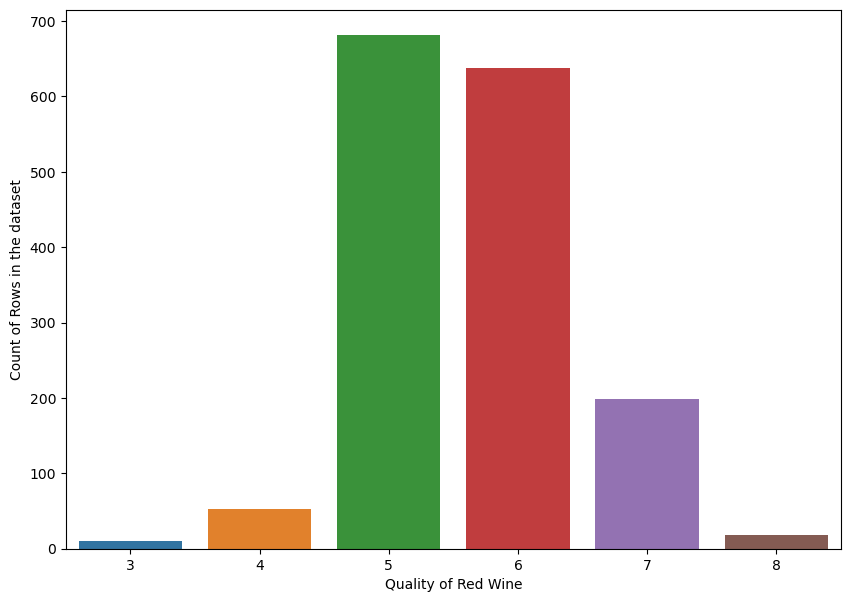

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = wine)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

Here we see the skewness information present in our dataset. We will ignore quality since it is our target label is in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

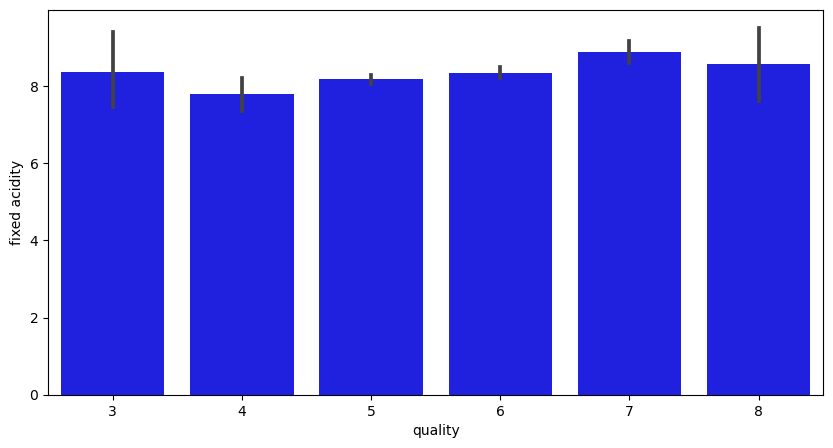

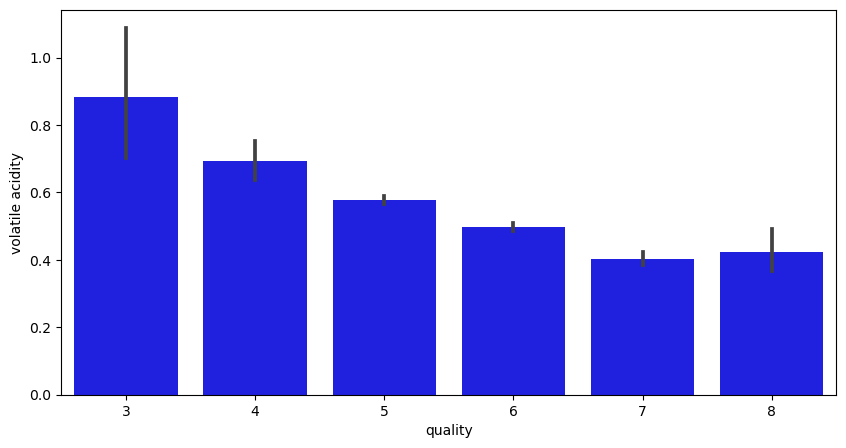

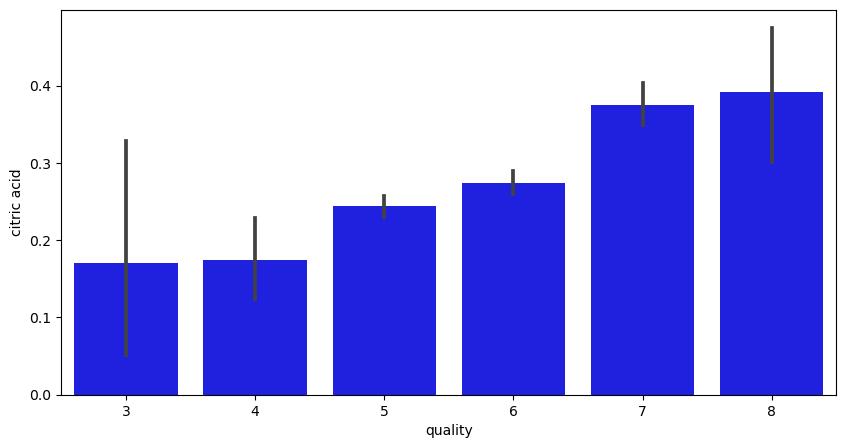

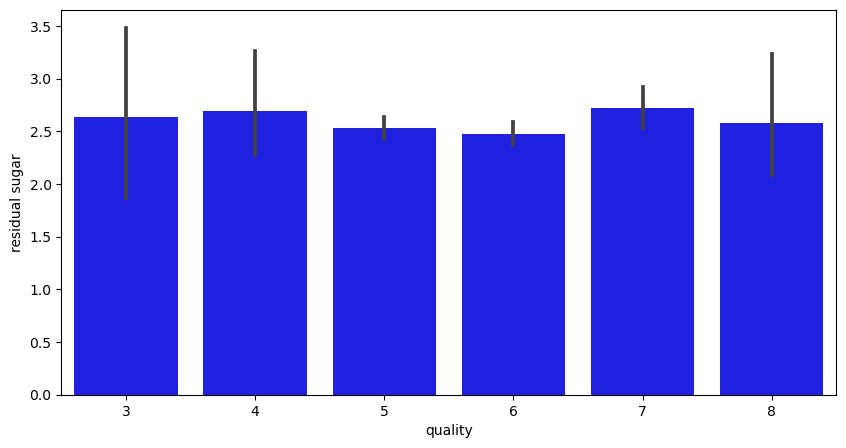

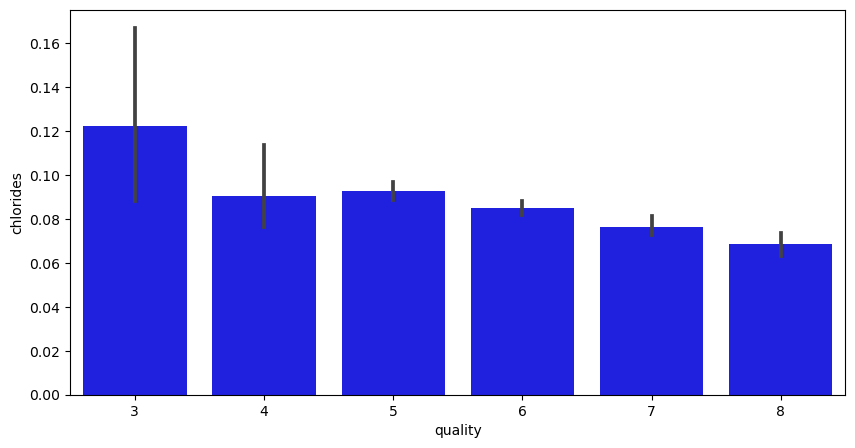

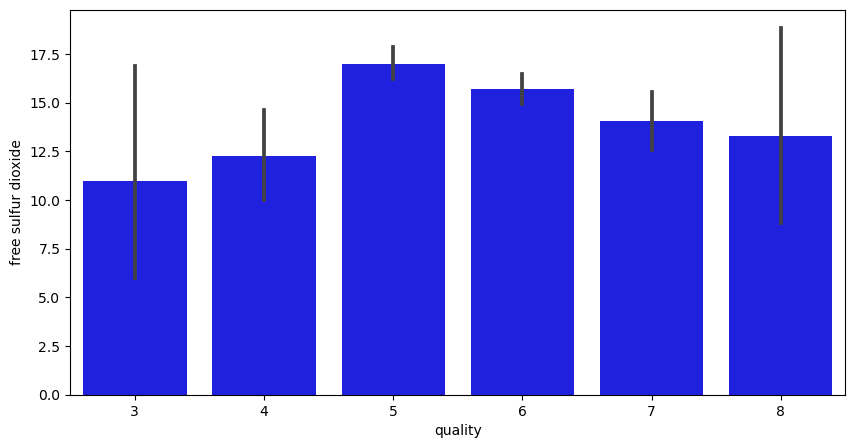

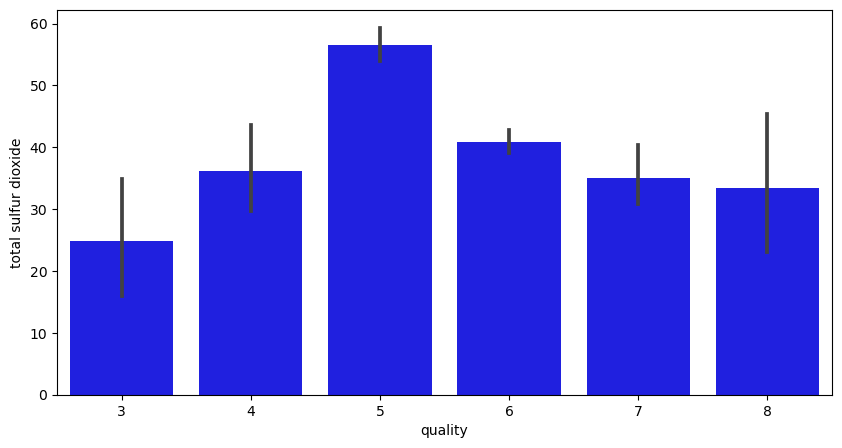

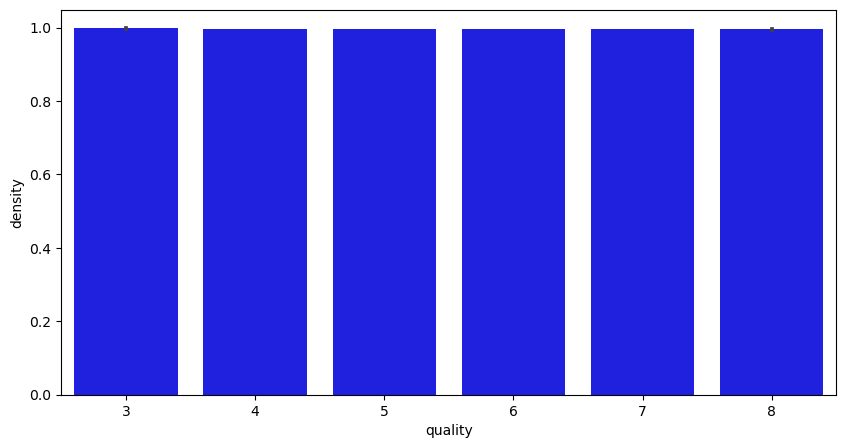

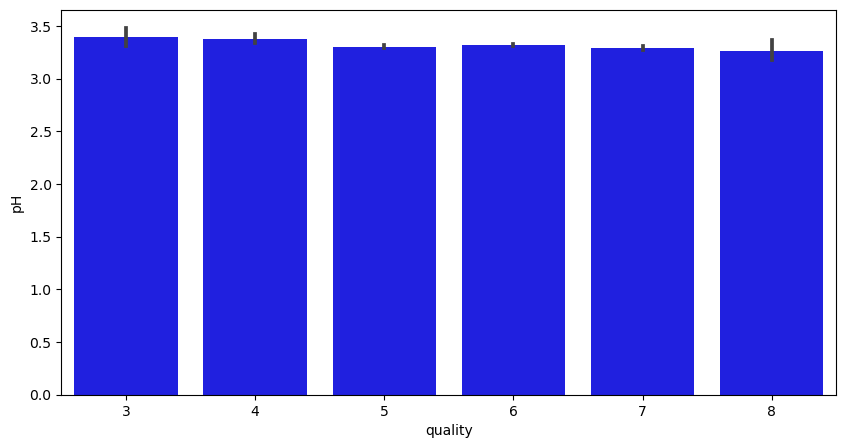

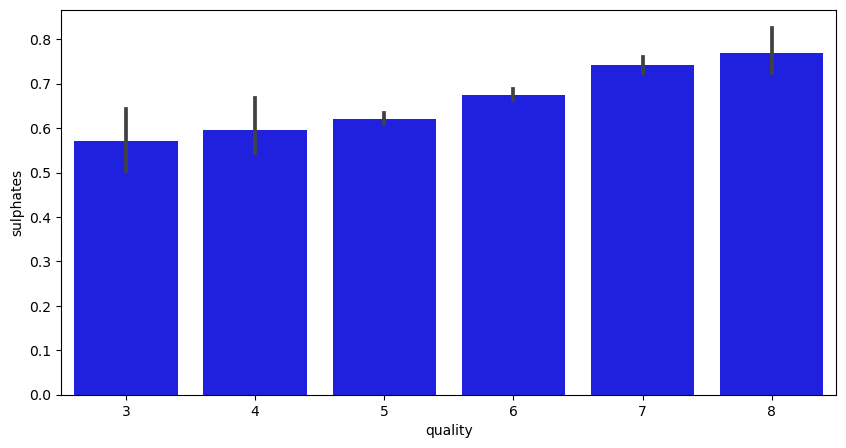

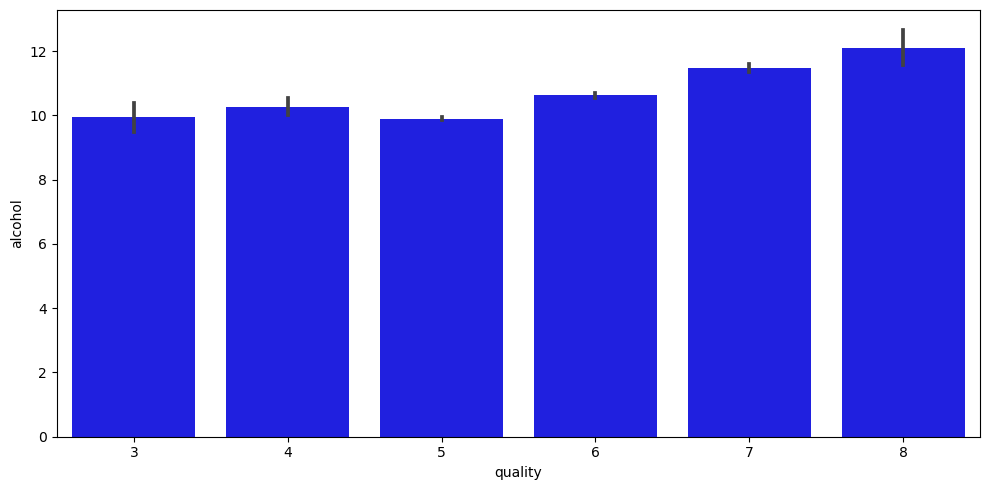

In [43]:
index=0
labels = wine['quality']
features = wine.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data = wine, color = "blue")
plt.tight_layout()
plt.show()

With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are: 01. fixed acidity vs quality - no fixed pattern 02. volatile acidity vs quality - there is a decreasing trend 03. citric acid vs quality - there is an increasing trend 04. residual sugar vs quality - no fixed pattern 05. chlorides vs quality - there is a decreasing trend 06. free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 07. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 08. density vs quality - no pattern at all 09. pH vs quality - no pattern at all 10. sulphates vs quality - there is an increasing trend 11. alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

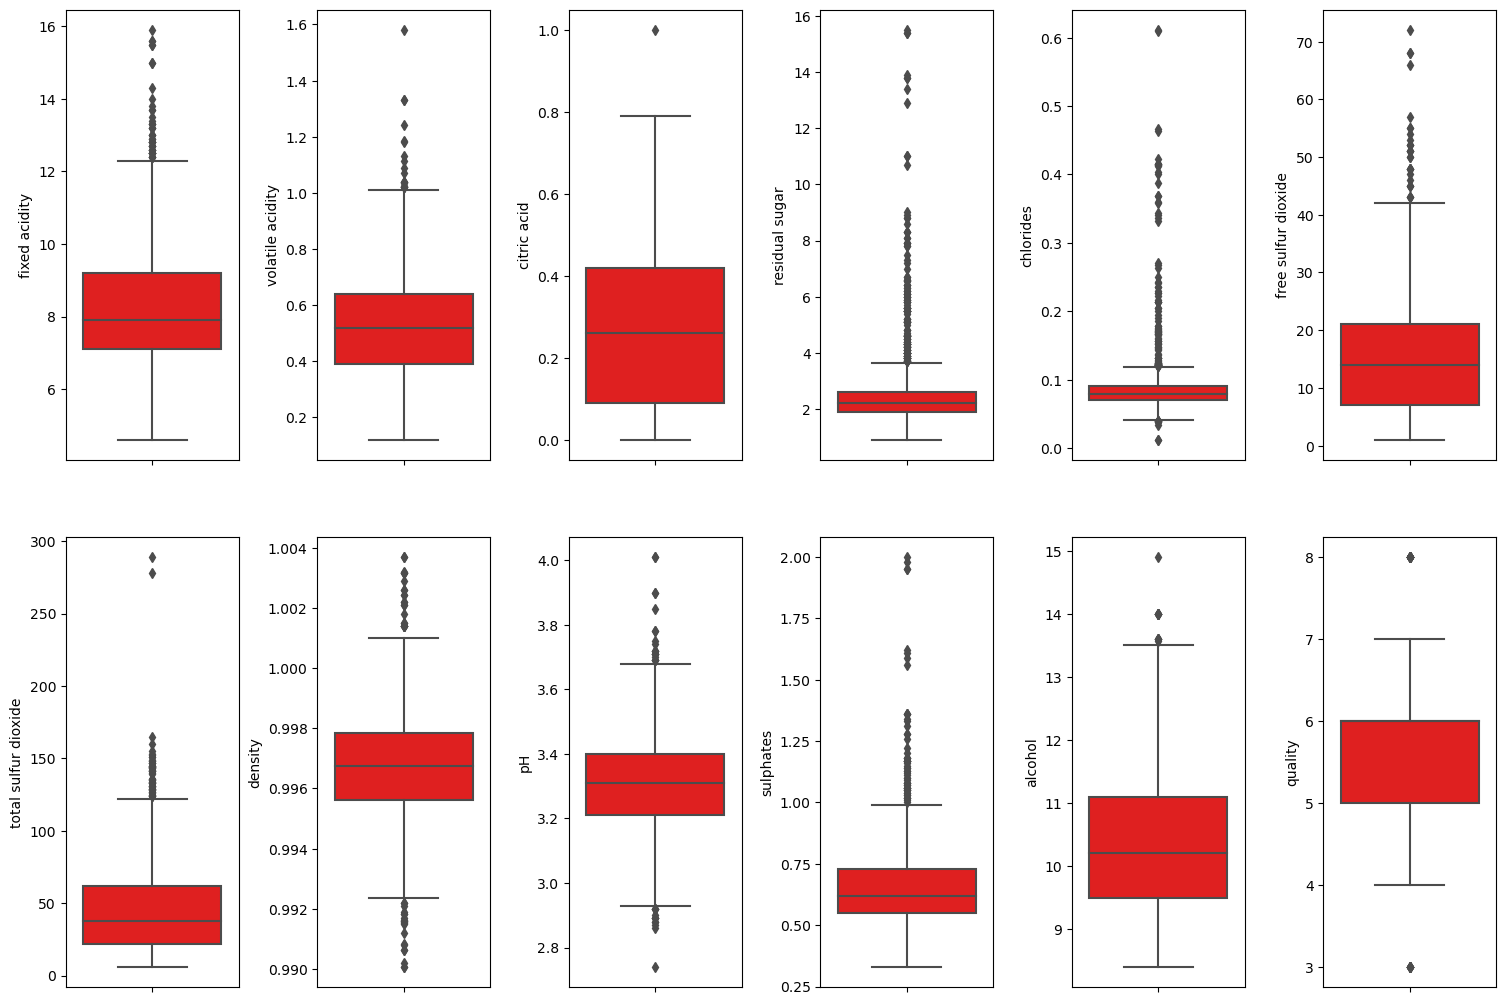

In [46]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in wine.items():
    sns.boxplot(y=col, data=wine, ax=ax[index], color="red")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

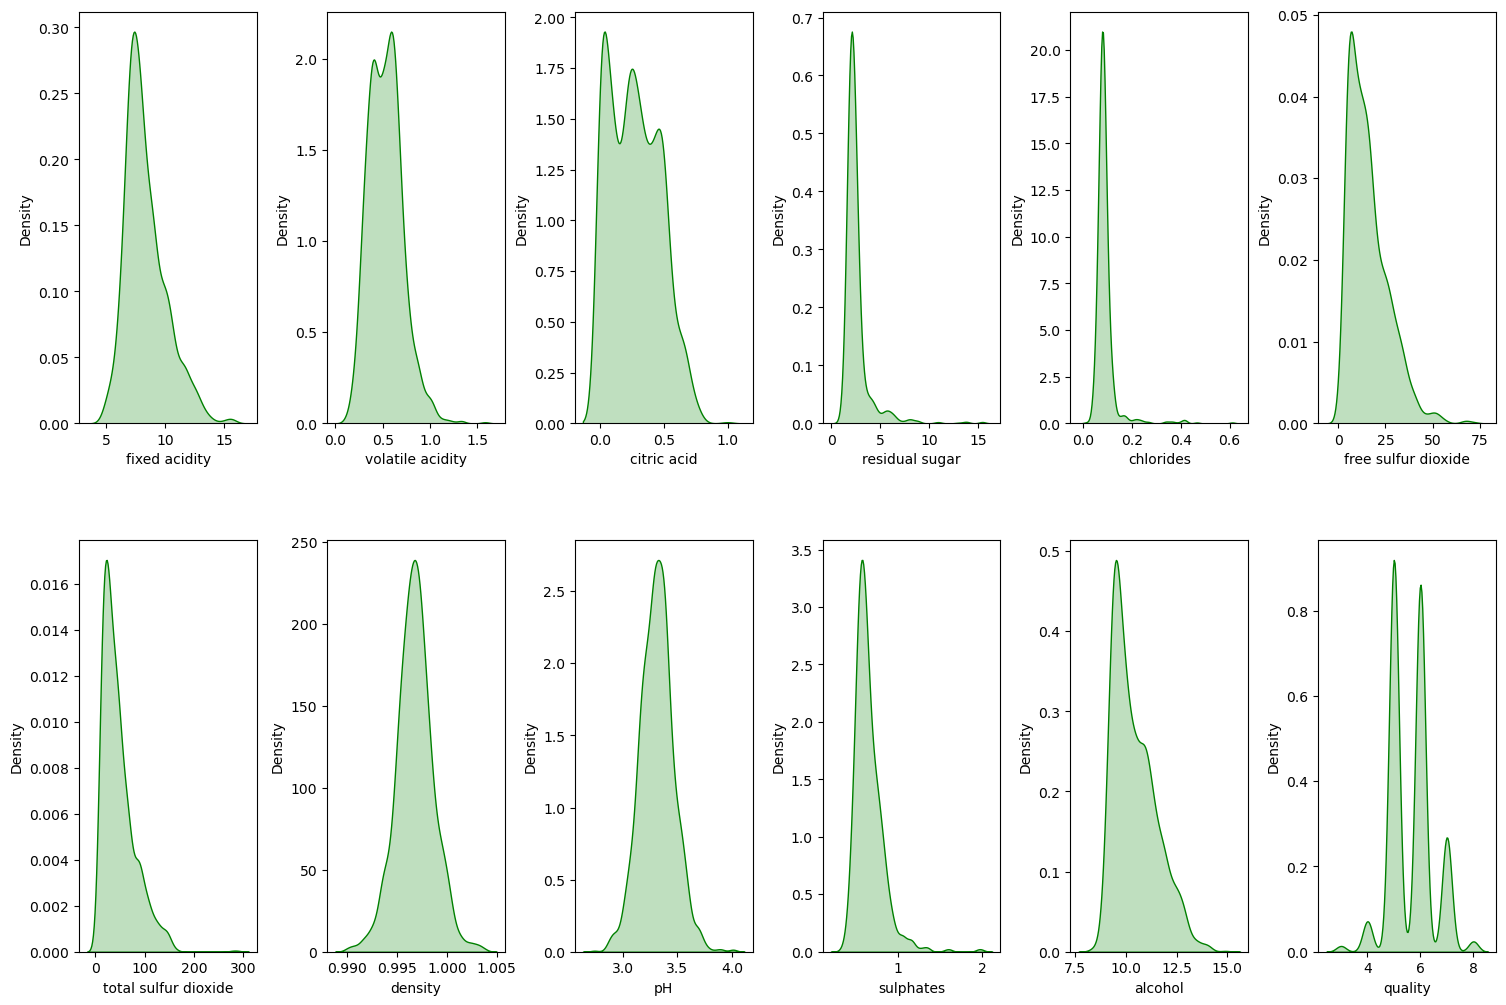

In [47]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in wine.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

### Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

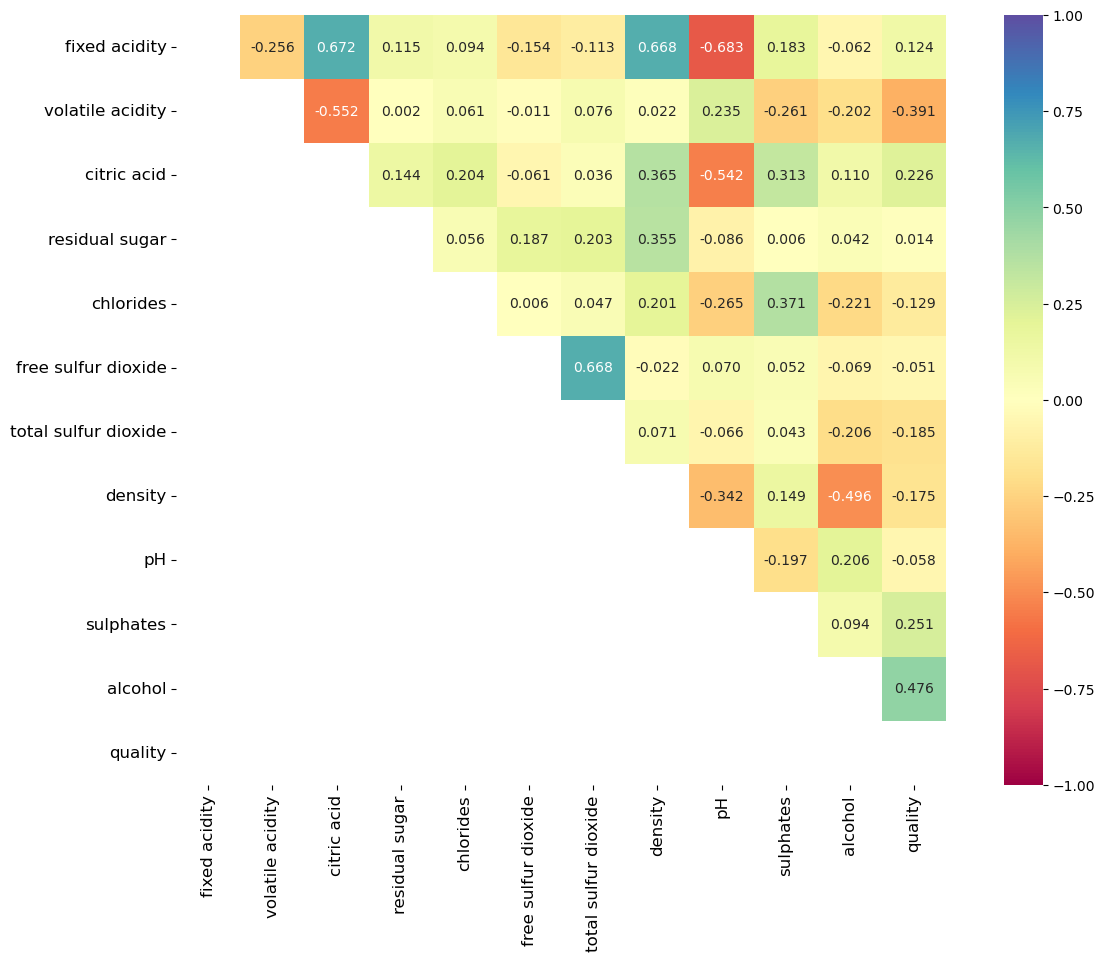

In [49]:
lower_triangle = np.tril(wine.corr())
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

### Dropping a column 

In [51]:
df = wine.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I feel that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore I am dropping the free option and keeping just the total option in our dataset.

### Outlier removal

In [52]:
df.shape

(1599, 11)

Confirming the number of columns and rows before removing the outliers from the dataset.



In [53]:
z = np.abs(zscore(df))
threshold = 3
np.where(z > 3)

df = df[(z < 3).all(axis = 1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [54]:
df.shape

(1464, 11)

Checking the number of rows present in the dataset after applying the outlier removal technique.


In [55]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss


8.442776735459661

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set post removal of the outliers.

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [56]:
X = df.drop('quality', axis=1)
Y = df['quality']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

### Taking care of class imbalance

In [57]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [58]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [59]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [60]:
Y # Displaying just the label

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

### Label Binarization

In [61]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [62]:
X # Displaying all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,8.842051,0.476075,0.403925,2.533645,0.073981,16.663553,0.993982,3.183178,0.696449,12.393462
3116,10.603912,0.353203,0.523594,2.563395,0.069908,15.816975,0.997107,3.159151,0.651830,11.032029
3117,10.352239,0.564521,0.586782,4.460284,0.079065,21.311612,0.997857,3.222312,0.706181,12.914561
3118,11.133082,0.324105,0.601518,2.087160,0.072564,27.589502,0.997428,2.981556,0.786148,10.251359


### Feature Scaling

In [63]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.665282,1.056405,-1.529154,-0.640168,-0.149480,-0.094718,0.838492,1.493004,-0.792803,-1.256932
1,-0.412309,2.072213,-1.529154,0.145903,1.042266,1.173118,0.224930,-0.779626,0.114363,-0.896396
2,-0.412309,1.395007,-1.321784,-0.190985,0.717245,0.673667,0.347642,-0.339762,-0.112428,-0.896396
3,1.737968,-1.313815,1.374028,-0.640168,-0.203650,0.904183,0.961205,-1.072868,-0.641609,-0.896396
4,-0.665282,1.056405,-1.529154,-0.640168,-0.149480,-0.094718,0.838492,1.493004,-0.792803,-1.256932
...,...,...,...,...,...,...,...,...,...,...
3115,0.246720,-0.207289,0.564895,0.071389,-0.258832,-0.760772,-1.504232,-0.902951,0.238711,1.441192
3116,1.360981,-0.900703,1.185290,0.104797,-0.479459,-0.793297,0.413083,-1.079090,-0.098592,0.214080
3117,1.201815,0.291847,1.512872,2.234926,0.016561,-0.582197,0.873381,-0.616058,0.312287,1.910880
3118,1.695646,-1.064914,1.589268,-0.429995,-0.335598,-0.341005,0.610082,-2.381054,0.916813,-0.489568


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

### Creating the training and testing data sets

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

### Machine Learning Model for Classification and Evaluation Metrics

In [67]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [82]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 90.22435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       391
           1       0.86      0.89      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.94871794871796

Accuracy Score - Cross Validation Score is 2.275641025641022


Created the Logistic Regression Model and checked for it's evaluation metrics.

## User interface to test the Logistic Regression Model

In [89]:
# Function to Predict Wine Quality
def predict_wine_quality(model, X, Y, wine_properties):
    # Training the model on the full dataset
    model.fit(X, Y)
    
    # Predicting wine quality
    wine_quality = model.predict([wine_properties])[0]
    
    print("The wine quality is", wine_quality)
    
    if wine_quality == 0:
        print("Predicted Wine Quality: Bad")
    else:
        print("Predicted Wine Quality: Good")


# User Interface
def user_interface():
    print("Enter the physicochemical properties of the wine:")
    fixed_acidity = float(input("Fixed Acidity: "))
    volatile_acidity = float(input("Volatile Acidity: "))
    citric_acid = float(input("Citric Acid: "))
    residual_sugar = float(input("Residual Sugar: "))
    chlorides = float(input("Chlorides: "))
    total_sulfur_dioxide = float(input("Total Sulfur Dioxide: "))
    density = float(input("Density: "))
    pH = float(input("pH: "))
    sulphates = float(input("Sulphates: "))
    alcohol = float(input("Alcohol: "))
    
    wine_properties = [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                       total_sulfur_dioxide, density, pH, sulphates, alcohol]
        
    # Create an instance of the classification model (e.g., logistic regression, decision tree, etc.)
    model = LogisticRegression()  
    # Replace with your chosen model
    
    # Call the classify function to train and evaluate the model
    classify(model, X, Y)
    
    # Call the predict_wine_quality function to predict the wine quality based on user input
    predict_wine_quality(model, X, Y, wine_properties)
    
    #test cases
    # 10.3	0.320	0.45	6.40	0.073	13.0	0.99760	3.23	0.82	12.600000	
    # 7.4	0.700	0.00	1.90	0.076	34.0	0.99780	3.51	0.56	9.400000	

# Run the user interface
user_interface()

Enter the physicochemical properties of the wine:
Fixed Acidity: 10.3
Volatile Acidity: 0.320
Citric Acid: 0.45
Residual Sugar: 6.40
Chlorides: 0.073
Total Sulfur Dioxide: 13.0
Density: 0.99760
pH: 3.23
Sulphates: 0.82
Alcohol: 12.6
Accuracy Score: 90.22435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       391
           1       0.86      0.89      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.94871794871796

Accuracy Score - Cross Validation Score is 2.275641025641022
The wine quality is 1
Predicted Wine Quality: Good


### Creating Another Random CSV Data to add to the Dataset

In [92]:
# import pandas as pd
import random

# Generate random wine quality data
data = {
    'fixed acidity': [random.uniform(4, 15) for _ in range(1000)],
    'volatile acidity': [random.uniform(0, 2) for _ in range(1000)],
    'citric acid': [random.uniform(0, 1) for _ in range(1000)],
    'residual sugar': [random.uniform(0, 16) for _ in range(1000)],
    'chlorides': [random.uniform(0, 0.5) for _ in range(1000)],
    'free sulfur dioxide': [random.uniform(1, 72) for _ in range(1000)],
    'total sulfur dioxide': [random.uniform(6, 289) for _ in range(1000)],
    'density': [random.uniform(0.990, 1.005) for _ in range(1000)],
    'pH': [random.uniform(2.9, 3.9) for _ in range(1000)],
    'sulphates': [random.uniform(0.3, 2) for _ in range(1000)],
    'alcohol': [random.uniform(8.4, 14.9) for _ in range(1000)],
    'quality': [random.randint(3, 8) for _ in range(1000)]
}

# Create DataFrame from the generated data
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
df.to_csv('wine_quality_data.csv', index=False)

print("CSV file created successfully.")


CSV file created successfully.


In [144]:
new_wine = pd.read_csv('wine_quality_data.csv')
new_wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4.117753,0.114904,0.003055,12.968216,0.253958,59.342026,217.369831,1.003101,3.088194,1.844927,10.962507,8
1,9.565866,0.758713,0.629029,6.267749,0.112962,5.175553,114.447393,0.996251,3.475041,0.902688,10.962026,3
2,9.006146,0.790566,0.738755,9.275348,0.442316,4.817425,172.591623,0.990815,3.418878,0.353797,14.816343,6
3,11.911053,1.418037,0.527007,5.267631,0.313749,18.217763,242.455728,1.000777,3.636319,1.383102,8.801852,3
4,7.576789,0.553431,0.341372,10.430874,0.498360,32.379667,120.558516,1.004254,3.463544,1.166502,14.197848,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.702720,0.567212,0.200149,2.589730,0.135099,50.701498,58.805668,0.996310,3.563122,1.596275,13.269660,7
996,4.358346,1.935785,0.003188,5.476496,0.042127,28.506768,105.145023,1.004251,3.507923,1.465476,12.417834,7
997,6.510607,1.258578,0.477567,13.279418,0.128893,17.009674,161.954931,0.996940,3.494152,0.856396,11.389538,4
998,9.978480,0.117186,0.332882,4.778327,0.354200,57.269964,198.421222,1.001146,3.513629,1.450901,13.136398,7


In [145]:
merged_wine = pd.concat([wine, new_wine], ignore_index=True)
print(merged_wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.700000     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
2594      14.702720          0.567212     0.200149        2.589730   0.135099   
2595       4.358346          1.935785     0.003188        5.476496   0.042127   
2596       6.510607          1.258578     0.477567       13.279418   0.128893   
2597       9.978480          0.117186     0.332882        4.778327   0.354200   
2598       8.926577          1.330310     0.468322        3.796554   0.371484   

      free sulfur dioxide  

So by taking a look at the above data frame I can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem!

### Exploratory Data Analysis (EDA)

In [147]:
merged_wine.shape

(2599, 12)

I see that there are total 1599 rows and 12 columns present in our dataset.

In [149]:
merged_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Luckily we do not see any missing values in any of the columns of our dataset so we don't have to worry about handling missing data.

In [150]:
merged_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2599 non-null   float64
 1   volatile acidity      2599 non-null   float64
 2   citric acid           2599 non-null   float64
 3   residual sugar        2599 non-null   float64
 4   chlorides             2599 non-null   float64
 5   free sulfur dioxide   2599 non-null   float64
 6   total sulfur dioxide  2599 non-null   float64
 7   density               2599 non-null   float64
 8   pH                    2599 non-null   float64
 9   sulphates             2599 non-null   float64
 10  alcohol               2599 non-null   float64
 11  quality               2599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 243.8 KB


Great none of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype.

In [151]:
merged_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000
mean,8.814210,0.725274,0.355728,4.636843,0.152070,23.942554,86.390771,0.996939,3.341016,0.842603,10.914823,5.573682
std,2.482888,0.451714,0.261220,4.061897,0.126441,18.148993,74.878547,0.003079,0.218398,0.408059,1.571208,1.240148
min,4.002921,0.003312,0.000000,0.008053,0.000691,1.000000,6.000000,0.990003,2.740000,0.304674,8.400000,3.000000
25%,7.100000,0.410000,0.140000,2.000000,0.073000,10.000000,28.000000,0.995200,3.193280,0.560000,9.600000,5.000000
50%,8.200000,0.590000,0.320000,2.500000,0.088000,18.000000,57.000000,0.996800,3.324014,0.680000,10.500000,6.000000
75%,10.347309,0.885974,0.510915,6.132855,0.206143,33.675389,126.886749,0.998525,3.464165,0.997007,11.900000,6.000000
max,15.900000,1.997974,1.000000,15.998702,0.611000,72.000000,289.000000,1.004994,4.010000,2.000000,14.900000,8.000000


Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

As per my observation:

1. There is a big gap between 75% and max values of residual sugar column
2. There is a big gap between 75% and max values of free sulfur dioxide column
3. There is a huge gap between 75% and max value of total sulfur dioxide column

All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

In [152]:
merged_wine.skew()

fixed acidity           0.599257
volatile acidity        1.159300
citric acid             0.571038
residual sugar          1.409644
chlorides               1.370288
free sulfur dioxide     0.968729
total sulfur dioxide    1.110546
density                 0.265392
pH                      0.388000
sulphates               1.285975
alcohol                 0.755502
quality                -0.071977
dtype: float64

Here we see the skewness information present in our dataset. We will ignore quality since it is our target label in the dataset. Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

### Visualization

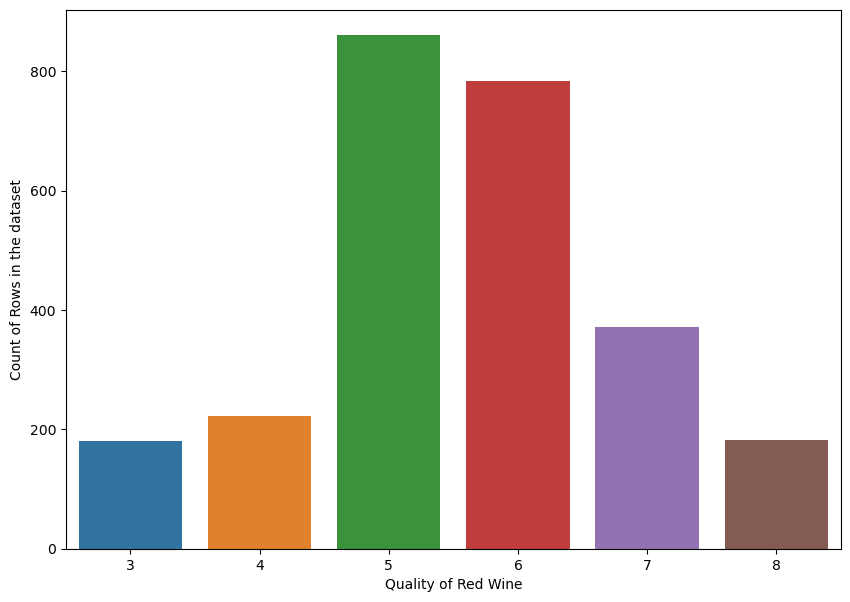

In [153]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = merged_wine)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

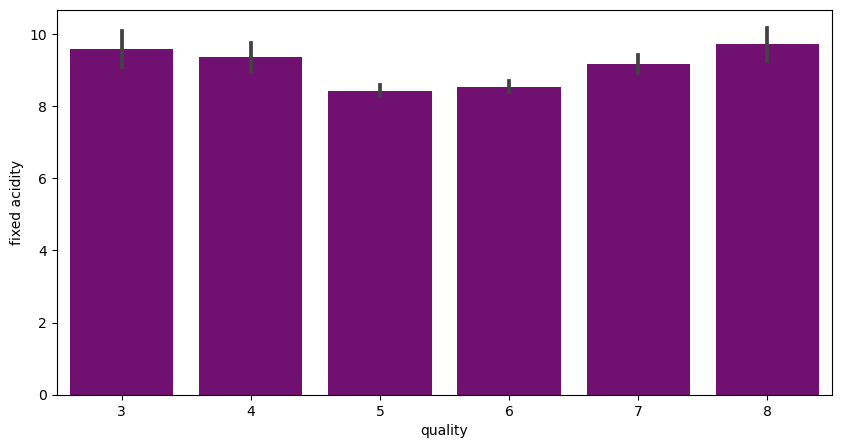

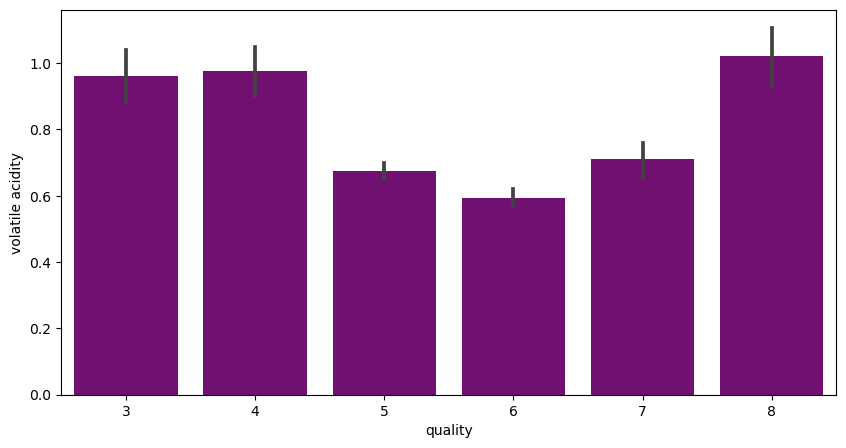

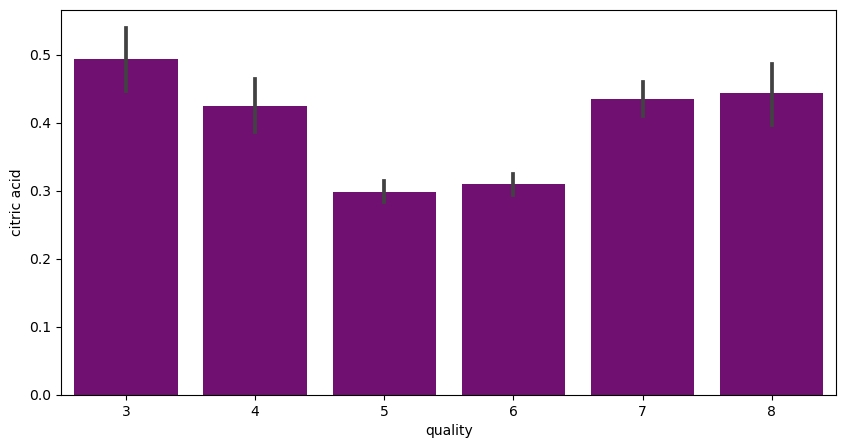

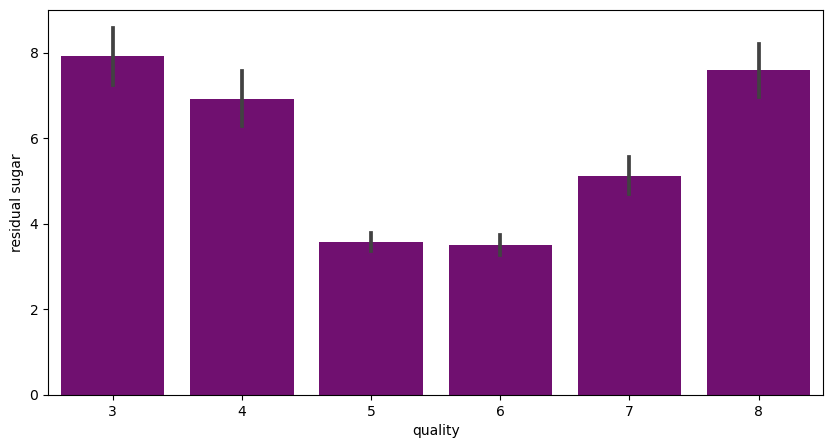

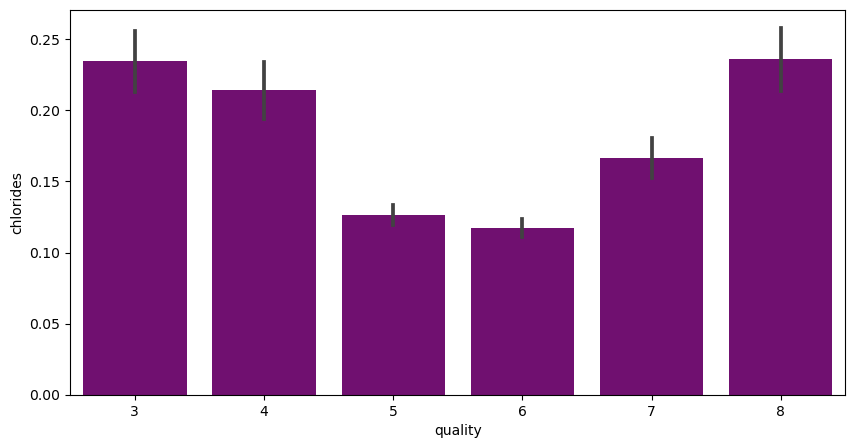

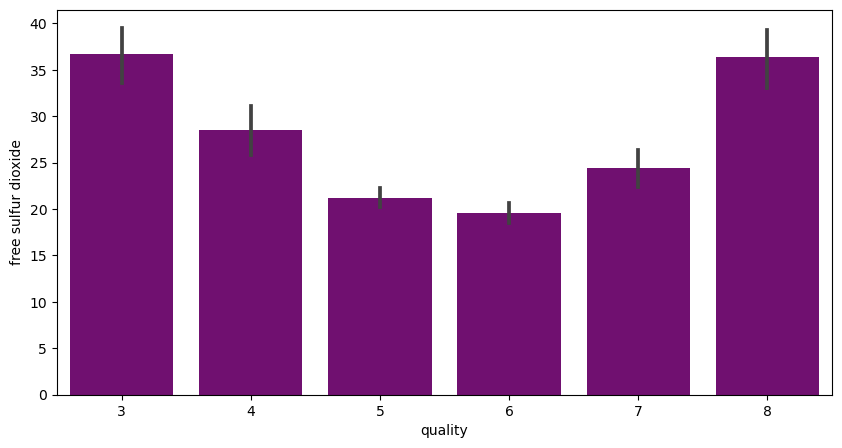

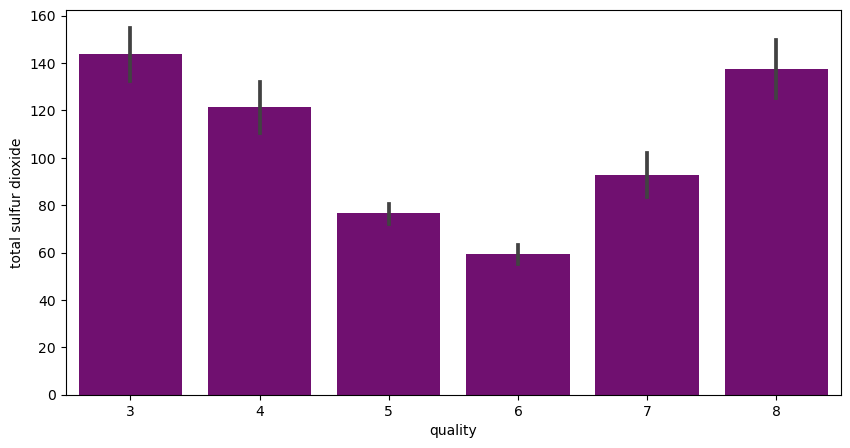

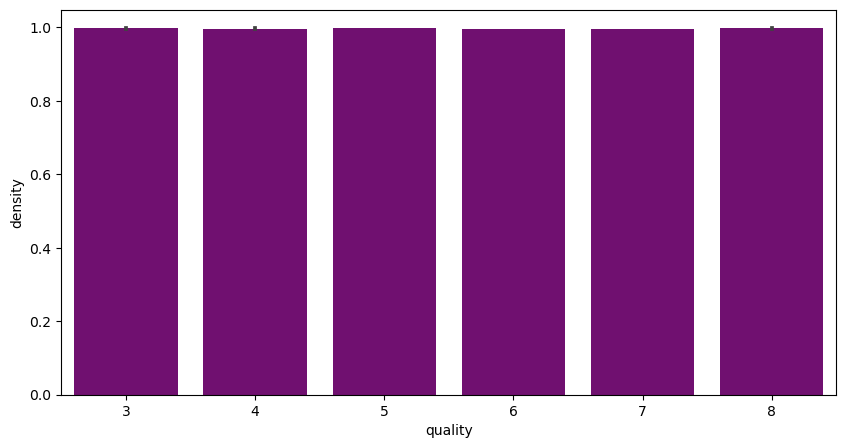

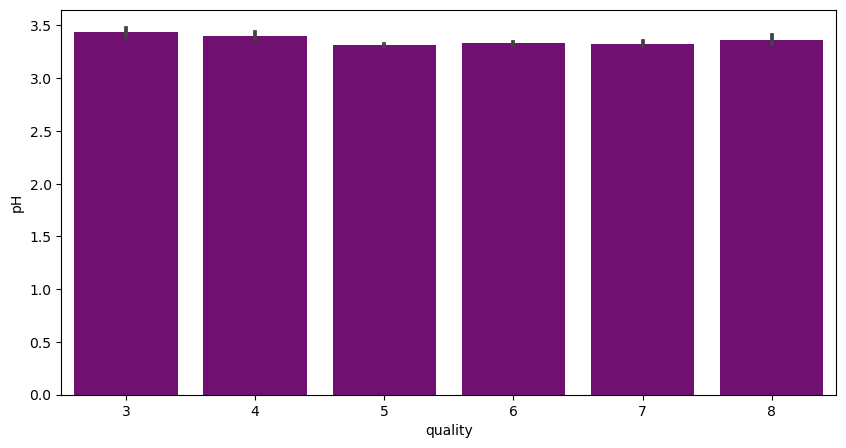

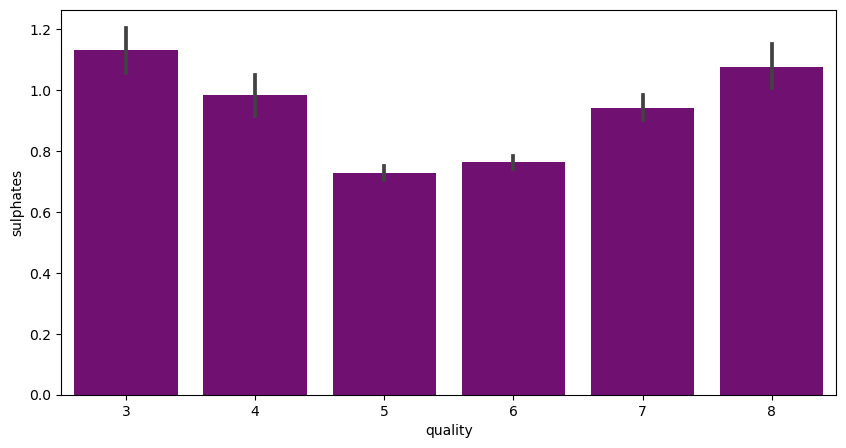

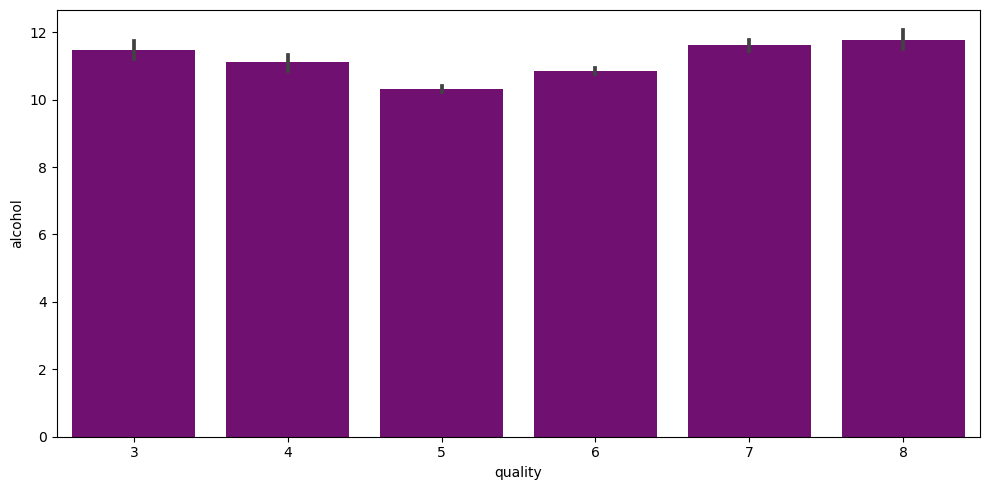

In [154]:
index=0
labels = merged_wine['quality']
features = merged_wine.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=merged_wine, color="purple")
plt.tight_layout()
plt.show()

With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are: 01. fixed acidity vs quality - no fixed pattern 02. volatile acidity vs quality - there is a decreasing trend 03. citric acid vs quality - there is an increasing trend 04. residual sugar vs quality - no fixed pattern 05. chlorides vs quality - there is a decreasing trend 06. free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 07. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing 08. density vs quality - no pattern at all 09. pH vs quality - no pattern at all 10. sulphates vs quality - there is an increasing trend 11. alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

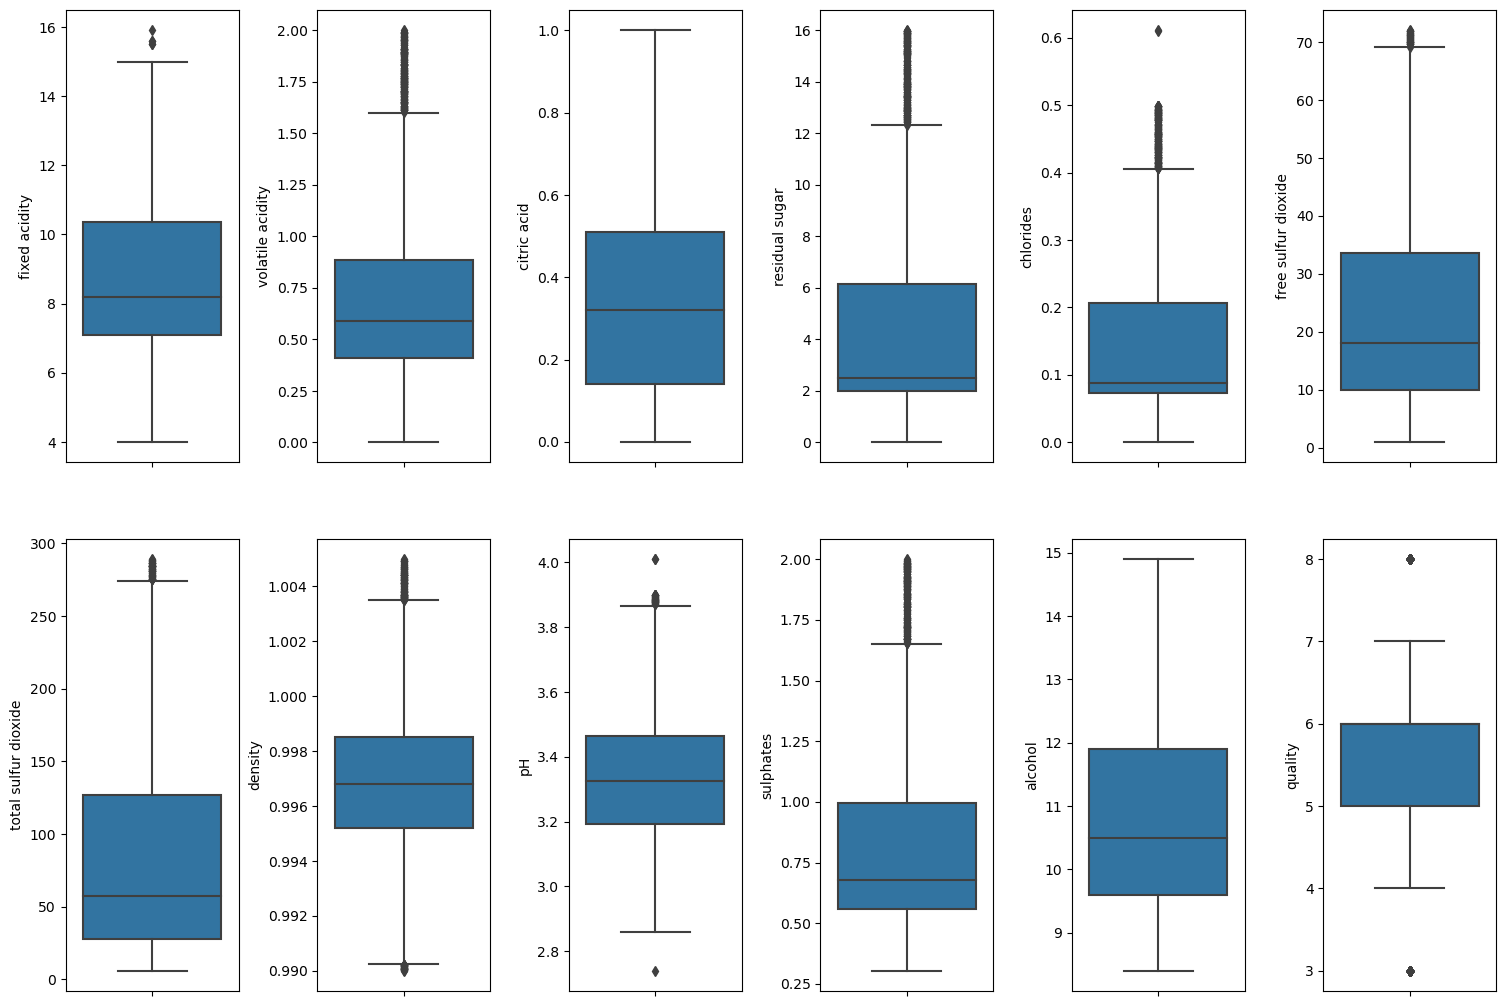

In [155]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in merged_wine.items():
    sns.boxplot(y=col, data=merged_wine, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

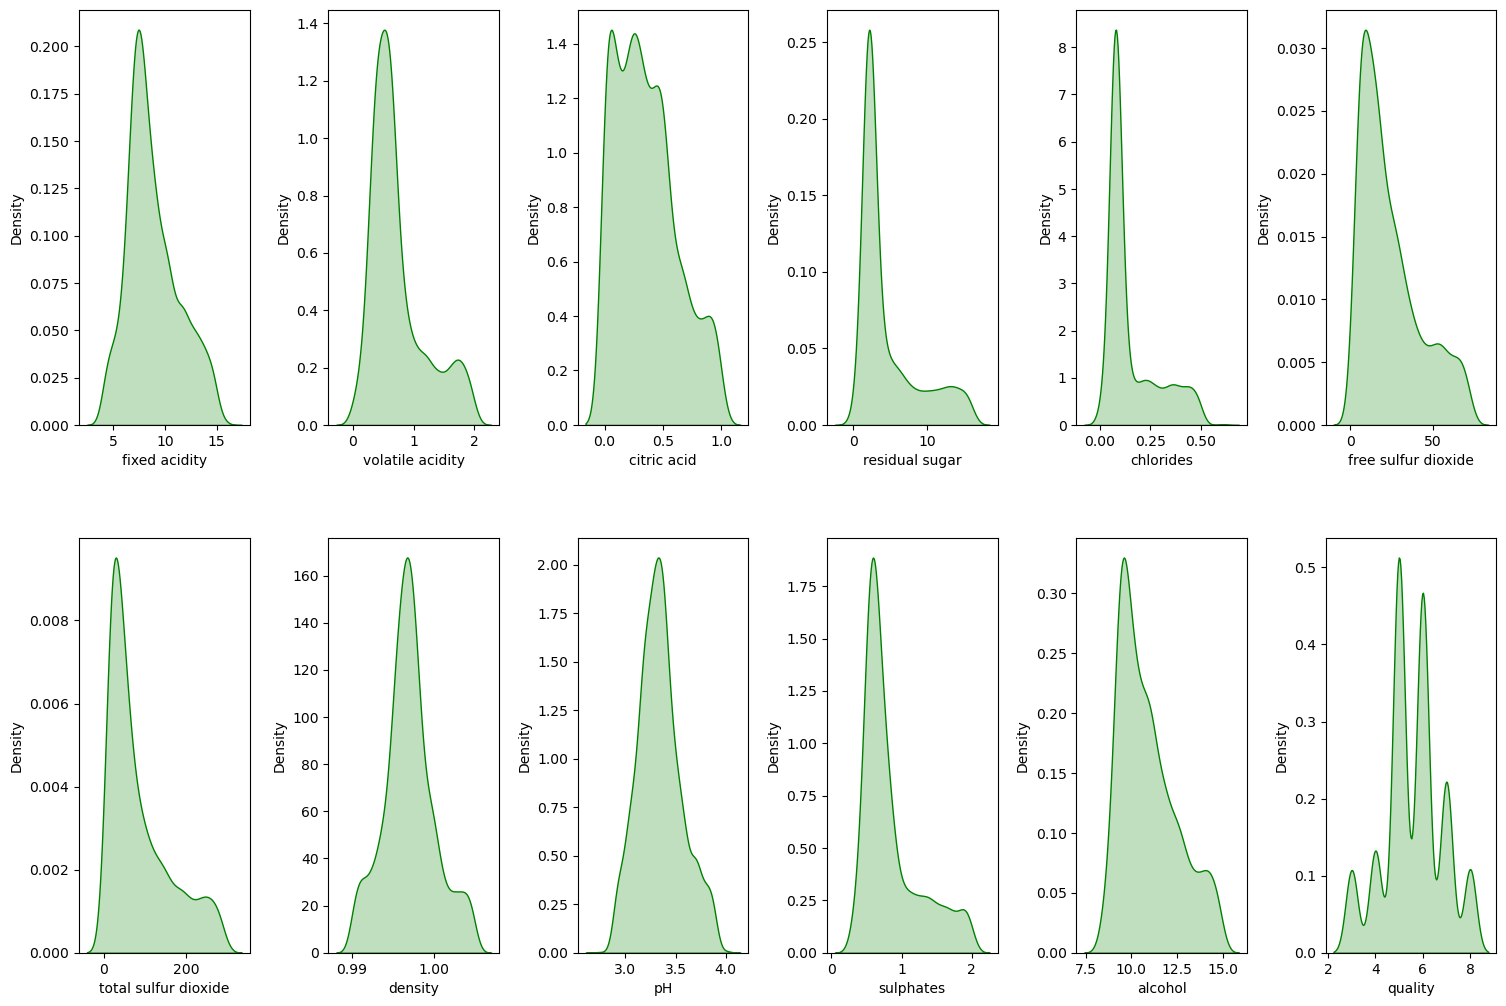

In [156]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in merged_wine.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

### Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

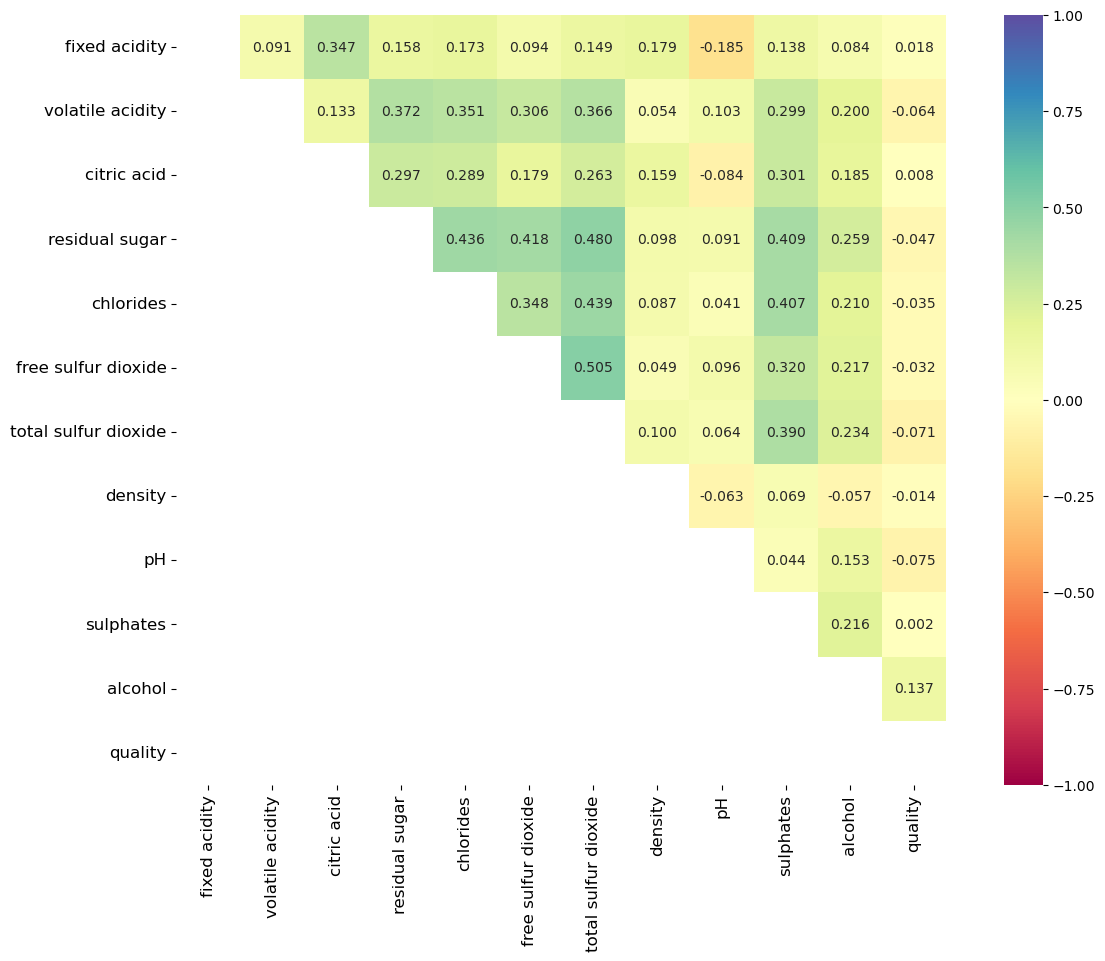

In [157]:
lower_triangle = np.tril(merged_wine.corr())
plt.figure(figsize=(15,10))
sns.heatmap(merged_wine.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

### No Dropping a column

In [179]:
merged_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2594,14.702720,0.567212,0.200149,2.589730,0.135099,50.701498,58.805668,0.996310,3.563122,1.596275,13.269660,7
2595,4.358346,1.935785,0.003188,5.476496,0.042127,28.506768,105.145023,1.004251,3.507923,1.465476,12.417834,7
2596,6.510607,1.258578,0.477567,13.279418,0.128893,17.009674,161.954931,0.996940,3.494152,0.856396,11.389538,4
2597,9.978480,0.117186,0.332882,4.778327,0.354200,57.269964,198.421222,1.001146,3.513629,1.450901,13.136398,7


I feel that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore I am dropping the free option and keeping just the total option in our dataset.

### Outlier removal

In [180]:
merged_wine.shape

(2595, 12)

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [182]:
X = merged_wine.drop('quality', axis=1)
Y = merged_wine['quality']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

### Taking care of class imbalance


In [183]:
Y.value_counts()

5    859
6    781
7    372
4    221
8    182
3    180
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.



In [184]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [185]:
Y.value_counts()

5    859
6    859
7    859
4    859
8    859
3    859
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.



In [186]:
Y # Displaying just the label


0       5
1       5
2       5
3       6
4       5
       ..
5149    8
5150    8
5151    8
5152    8
5153    8
Name: quality, Length: 5154, dtype: int64

### Label Binarization


In [187]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
5149    1
5150    1
5151    1
5152    1
5153    1
Name: quality, Length: 5154, dtype: int64

Using the label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [188]:
X # Displaying all the features except the label


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
5149,6.071466,1.139098,0.201749,10.795051,0.241639,56.460034,258.570204,0.997833,3.533418,1.203257,9.673157
5150,11.348030,1.559096,0.805787,4.247084,0.420765,37.965541,75.978490,1.002101,3.077938,0.825617,13.797880
5151,9.209968,1.517069,0.101594,4.321298,0.194196,20.930336,182.444666,1.001697,3.271055,1.676216,13.743964
5152,14.073176,1.814506,0.919870,13.828557,0.040907,52.412596,113.738798,0.993349,3.275409,1.629682,14.208413


### Feature Scaling

In [189]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.656056,-0.264612,-1.543228,-0.902726,-0.818774,-0.847150,-0.872821,0.273542,0.693364,-0.892153,-1.144931
1,-0.498311,0.119079,-1.543228,-0.739356,-0.651404,-0.138509,-0.470227,-0.043004,-0.724321,-0.605513,-0.887607
2,-0.498311,-0.136715,-1.389614,-0.809372,-0.697050,-0.644681,-0.628825,0.020305,-0.449930,-0.677173,-0.887607
3,0.842521,-1.159890,0.607369,-0.902726,-0.826382,-0.543447,-0.555626,0.336851,-0.907248,-0.844379,-0.887607
4,-0.656056,-0.264612,-1.543228,-0.902726,-0.818774,-0.847150,-0.872821,0.273542,0.693364,-0.892153,-1.144931
...,...,...,...,...,...,...,...,...,...,...,...
5149,-1.179980,0.671375,-0.768439,1.173254,0.441370,1.453912,1.866892,0.284088,0.800456,0.644373,-0.969207
5150,0.900899,1.566649,1.551277,-0.354950,1.804118,0.517771,-0.360691,1.635043,-1.282531,-0.257683,1.684269
5151,0.057727,1.477064,-1.153071,-0.337629,0.080435,-0.344504,0.938175,1.506973,-0.399376,1.774115,1.649584
5152,1.975594,2.111087,1.989399,1.881231,-1.085754,1.249042,0.099977,-1.135476,-0.379463,1.662961,1.948369


Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

### Creating the training and testing data sets

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

### Machine Learning Model for Classification and Evaluation Metrics

In [191]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

### Testing the accuracy of Logistic Regression

In [192]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 67.89524733268671

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       703
           1       0.49      0.20      0.29       328

    accuracy                           0.68      1031
   macro avg       0.60      0.55      0.54      1031
weighted avg       0.64      0.68      0.63      1031

Cross Validation Score: 62.26325652349966

Accuracy Score - Cross Validation Score is 5.6319908091870445


## Update user interface to test the Logistic Regression Model

In [194]:
# Function to Predict Wine Quality
def predict_wine_quality(model, X, Y, wine_properties):
    
    # Training the model on the full dataset
    model.fit(X, Y)
    
    # Predicting wine quality
    wine_quality = model.predict([wine_properties])[0]
    
    print("The wine quality is", wine_quality)
    
    if wine_quality == 0:
        print("Predicted Wine Quality: Bad")
    else:
        print("Predicted Wine Quality: Good")
        

# User Interface
def user_interface():
    print("Enter the physicochemical properties of the wine:")
    fixed_acidity = float(input("Fixed Acidity: "))
    volatile_acidity = float(input("Volatile Acidity: "))
    citric_acid = float(input("Citric Acid: "))
    residual_sugar = float(input("Residual Sugar: "))
    chlorides = float(input("Chlorides: "))
    free_sulfur_dioxide = float(input("Free Sulfur Dioxide: "))
    total_sulfur_dioxide = float(input("Total Sulfur Dioxide: "))
    density = float(input("Density: "))
    pH = float(input("pH: "))
    sulphates = float(input("Sulphates: "))
    alcohol = float(input("Alcohol: "))
    
    wine_properties = [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]
    
    # Create an instance of the classification model (e.g., logistic regression, decision tree, etc.)
    model = LogisticRegression()  
    # Replace with your chosen model
    
    # Call the classify function to train and evaluate the model
    classify(model, X, Y)
    
    # Call the predict_wine_quality function to predict the wine quality based on user input
    predict_wine_quality(model, X, Y, wine_properties)
    
    # test case
    # 10.3  0.320   0.45    6.40    0.073   5.0 13.0    0.99760 3.23    0.82    12.600000   

# Run the user interface
user_interface()

Enter the physicochemical properties of the wine:
Fixed Acidity: 10.3
Volatile Acidity: 0.320
Citric Acid: 0.45
Residual Sugar: 6.40
Chlorides: 0.073
Free Sulfur Dioxide: 5.0
Total Sulfur Dioxide: 13.0
Density: 0.99760
pH: 3.23
Sulphates: 0.82
Alcohol: 12.60
Accuracy Score: 67.89524733268671

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       703
           1       0.49      0.20      0.29       328

    accuracy                           0.68      1031
   macro avg       0.60      0.55      0.54      1031
weighted avg       0.64      0.68      0.63      1031

Cross Validation Score: 62.26325652349966

Accuracy Score - Cross Validation Score is 5.6319908091870445
The wine quality is 1
Predicted Wine Quality: Good
